In [1]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [2]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [3]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))  # This last layer only returns the last outputs.
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [4]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [5]:
from keras.layers import Dense

model1 = Sequential()
model1.add(Embedding(max_features, 64))
model1.add(SimpleRNN(128))
model1.add(Dense(1, activation='sigmoid'))

model1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history1 = model1.fit(input_train, y_train,
                    epochs=20,
                    batch_size=512,
                    validation_split=0.2)

Epoch 1/20
40/40 [==============================] - 9s 228ms/step - loss: 0.6838 - acc: 0.5577 - val_loss: 0.6673 - val_acc: 0.5748
Epoch 2/20
40/40 [==============================] - 8s 201ms/step - loss: 0.5789 - acc: 0.7426 - val_loss: 0.5617 - val_acc: 0.7572
Epoch 3/20
40/40 [==============================] - 8s 204ms/step - loss: 0.4395 - acc: 0.8270 - val_loss: 0.5271 - val_acc: 0.7474
Epoch 4/20
40/40 [==============================] - 8s 206ms/step - loss: 0.3506 - acc: 0.8683 - val_loss: 0.4367 - val_acc: 0.8114
Epoch 5/20
40/40 [==============================] - 8s 205ms/step - loss: 0.2652 - acc: 0.9074 - val_loss: 0.4483 - val_acc: 0.8090
Epoch 6/20
40/40 [==============================] - 8s 208ms/step - loss: 0.2078 - acc: 0.9309 - val_loss: 0.4361 - val_acc: 0.8344
Epoch 7/20
40/40 [==============================] - 8s 206ms/step - loss: 0.1972 - acc: 0.9366 - val_loss: 0.4628 - val_acc: 0.7880
Epoch 8/20
40/40 [==============================] - 8s 205ms/step - loss: 0.

In [6]:
#not research part of an assignment

In [12]:
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(SimpleRNN(512))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='Adamax', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=50,
                    batch_size=512,
                    validation_split=0.2)

Epoch 1/50
40/40 [==============================] - 180s 4s/step - loss: 0.7014 - acc: 0.5100 - val_loss: 0.7018 - val_acc: 0.4938
Epoch 2/50
40/40 [==============================] - 181s 5s/step - loss: 0.6892 - acc: 0.5304 - val_loss: 0.6833 - val_acc: 0.5696
Epoch 3/50
40/40 [==============================] - 186s 5s/step - loss: 0.6788 - acc: 0.5810 - val_loss: 0.6766 - val_acc: 0.5744
Epoch 4/50
40/40 [==============================] - 181s 5s/step - loss: 0.6612 - acc: 0.6438 - val_loss: 0.6716 - val_acc: 0.5516
Epoch 5/50
40/40 [==============================] - 181s 5s/step - loss: 0.6390 - acc: 0.6374 - val_loss: 0.6487 - val_acc: 0.6042
Epoch 6/50
40/40 [==============================] - 184s 5s/step - loss: 0.6004 - acc: 0.7097 - val_loss: 0.6233 - val_acc: 0.6394
Epoch 7/50
40/40 [==============================] - 211s 5s/step - loss: 0.5545 - acc: 0.7359 - val_loss: 0.5937 - val_acc: 0.6716
Epoch 8/50
40/40 [==============================] - 205s 5s/step - loss: 0.4916 - a

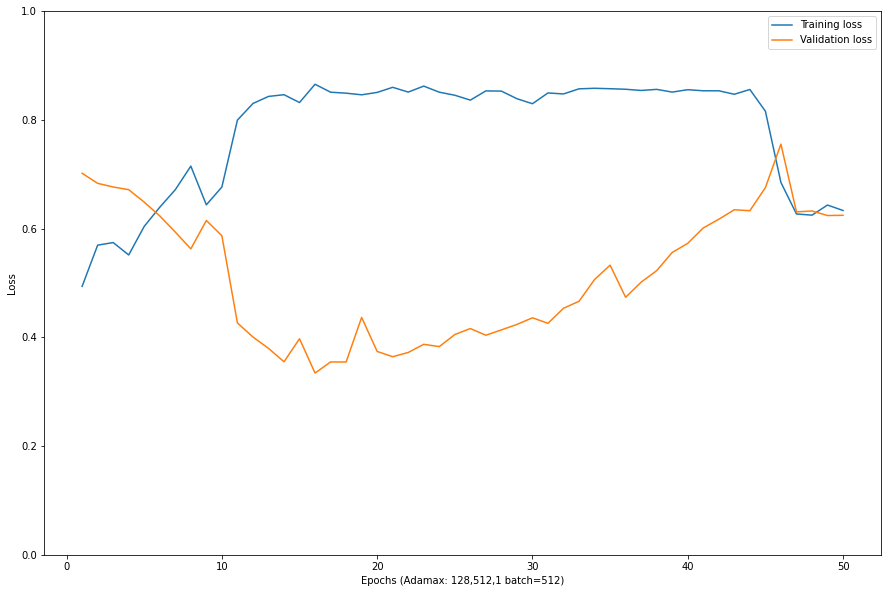

In [40]:

model2 = Sequential()
model2.add(Embedding(max_features, 64))
model2.add(SimpleRNN(128))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(optimizer='Adadelta', loss='binary_crossentropy', metrics=['acc'])
history2 = model2.fit(input_train, y_train,
                    epochs=20,
                    batch_size=512,
                    validation_split=0.2)

Epoch 1/20
40/40 [==============================] - 20s 495ms/step - loss: 0.6991 - acc: 0.4979 - val_loss: 0.6972 - val_acc: 0.5096
Epoch 2/20
40/40 [==============================] - 19s 482ms/step - loss: 0.6991 - acc: 0.4976 - val_loss: 0.6972 - val_acc: 0.5092
Epoch 3/20
40/40 [==============================] - 19s 482ms/step - loss: 0.6990 - acc: 0.4976 - val_loss: 0.6972 - val_acc: 0.5088
Epoch 4/20
40/40 [==============================] - 19s 482ms/step - loss: 0.6990 - acc: 0.4975 - val_loss: 0.6972 - val_acc: 0.5086
Epoch 5/20
40/40 [==============================] - 19s 481ms/step - loss: 0.6989 - acc: 0.4976 - val_loss: 0.6971 - val_acc: 0.5088
Epoch 6/20
40/40 [==============================] - 19s 477ms/step - loss: 0.6989 - acc: 0.4973 - val_loss: 0.6971 - val_acc: 0.5094
Epoch 7/20
40/40 [==============================] - 19s 479ms/step - loss: 0.6988 - acc: 0.4976 - val_loss: 0.6971 - val_acc: 0.5100
Epoch 8/20
40/40 [==============================] - 19s 478ms/step - 

In [41]:

model3 = Sequential()
model3.add(Embedding(max_features, 64))
model3.add(SimpleRNN(128))
model3.add(Dense(1, activation='sigmoid'))

model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history3 = model3.fit(input_train, y_train,
                    epochs=20,
                    batch_size=512,
                    validation_split=0.2)

Epoch 1/20
40/40 [==============================] - 18s 440ms/step - loss: 0.6465 - acc: 0.6245 - val_loss: 0.6057 - val_acc: 0.6732
Epoch 2/20
40/40 [==============================] - 17s 432ms/step - loss: 0.4825 - acc: 0.8054 - val_loss: 0.4274 - val_acc: 0.8350
Epoch 3/20
40/40 [==============================] - 17s 433ms/step - loss: 0.3527 - acc: 0.8673 - val_loss: 0.3995 - val_acc: 0.8300
Epoch 4/20
40/40 [==============================] - 17s 431ms/step - loss: 0.2897 - acc: 0.8979 - val_loss: 0.3691 - val_acc: 0.8444
Epoch 5/20
40/40 [==============================] - 17s 430ms/step - loss: 0.2365 - acc: 0.9168 - val_loss: 0.3737 - val_acc: 0.8414
Epoch 6/20
40/40 [==============================] - 17s 434ms/step - loss: 0.2160 - acc: 0.9259 - val_loss: 0.3774 - val_acc: 0.8458
Epoch 7/20
40/40 [==============================] - 17s 432ms/step - loss: 0.1788 - acc: 0.9417 - val_loss: 0.3641 - val_acc: 0.8496
Epoch 8/20
40/40 [==============================] - 17s 431ms/step - 

In [42]:

model4 = Sequential()
model4.add(Embedding(max_features, 64))
model4.add(SimpleRNN(128))
model4.add(Dense(1, activation='sigmoid'))

model4.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['acc'])
history4 = model4.fit(input_train, y_train,
                    epochs=20,
                    batch_size=512,
                    validation_split=0.2)

Epoch 1/20
40/40 [==============================] - 18s 458ms/step - loss: 0.6968 - acc: 0.5068 - val_loss: 0.6978 - val_acc: 0.4920
Epoch 2/20
40/40 [==============================] - 18s 450ms/step - loss: 0.6958 - acc: 0.5084 - val_loss: 0.6974 - val_acc: 0.4932
Epoch 3/20
40/40 [==============================] - 18s 443ms/step - loss: 0.6951 - acc: 0.5102 - val_loss: 0.6967 - val_acc: 0.4968
Epoch 4/20
40/40 [==============================] - 18s 442ms/step - loss: 0.6943 - acc: 0.5135 - val_loss: 0.6963 - val_acc: 0.5008
Epoch 5/20
40/40 [==============================] - 18s 443ms/step - loss: 0.6937 - acc: 0.5149 - val_loss: 0.6960 - val_acc: 0.5022
Epoch 6/20
40/40 [==============================] - 18s 440ms/step - loss: 0.6931 - acc: 0.5175 - val_loss: 0.6959 - val_acc: 0.5076
Epoch 7/20
40/40 [==============================] - 18s 440ms/step - loss: 0.6926 - acc: 0.5175 - val_loss: 0.6952 - val_acc: 0.5042
Epoch 8/20
40/40 [==============================] - 18s 440ms/step - 

In [43]:

model5 = Sequential()
model5.add(Embedding(max_features, 64))
model5.add(SimpleRNN(128))
model5.add(Dense(1, activation='sigmoid'))

model5.compile(optimizer='Nadam', loss='binary_crossentropy', metrics=['acc'])
history5 = model5.fit(input_train, y_train,
                    epochs=20,
                    batch_size=512,
                    validation_split=0.2)

Epoch 1/20
40/40 [==============================] - 16s 408ms/step - loss: 0.6887 - acc: 0.5380 - val_loss: 0.6805 - val_acc: 0.5960
Epoch 2/20
40/40 [==============================] - 16s 389ms/step - loss: 0.6482 - acc: 0.6639 - val_loss: 0.6372 - val_acc: 0.6538
Epoch 3/20
40/40 [==============================] - 16s 390ms/step - loss: 0.5081 - acc: 0.7815 - val_loss: 0.4723 - val_acc: 0.7874
Epoch 4/20
40/40 [==============================] - 16s 388ms/step - loss: 0.3473 - acc: 0.8647 - val_loss: 0.5950 - val_acc: 0.6766
Epoch 5/20
40/40 [==============================] - 16s 389ms/step - loss: 0.3122 - acc: 0.8777 - val_loss: 0.3726 - val_acc: 0.8438
Epoch 6/20
40/40 [==============================] - 15s 387ms/step - loss: 0.2263 - acc: 0.9180 - val_loss: 0.4368 - val_acc: 0.8050
Epoch 7/20
40/40 [==============================] - 15s 384ms/step - loss: 0.1790 - acc: 0.9396 - val_loss: 0.6019 - val_acc: 0.7884
Epoch 8/20
40/40 [==============================] - 15s 383ms/step - 

In [44]:

model6 = Sequential()
model6.add(Embedding(max_features, 64))
model6.add(SimpleRNN(128))
model6.add(Dense(1, activation='sigmoid'))

model6.compile(optimizer='Adagrad', loss='binary_crossentropy', metrics=['acc'])
history6 = model6.fit(input_train, y_train,
                    epochs=20,
                    batch_size=512,
                    validation_split=0.2)

Epoch 1/20
40/40 [==============================] - 15s 379ms/step - loss: 0.6983 - acc: 0.4999 - val_loss: 0.6994 - val_acc: 0.4978
Epoch 2/20
40/40 [==============================] - 15s 364ms/step - loss: 0.6979 - acc: 0.5019 - val_loss: 0.6991 - val_acc: 0.4980
Epoch 3/20
40/40 [==============================] - 15s 367ms/step - loss: 0.6975 - acc: 0.5026 - val_loss: 0.6989 - val_acc: 0.4966
Epoch 4/20
40/40 [==============================] - 15s 368ms/step - loss: 0.6972 - acc: 0.5023 - val_loss: 0.6987 - val_acc: 0.4960
Epoch 5/20
40/40 [==============================] - 15s 367ms/step - loss: 0.6969 - acc: 0.5038 - val_loss: 0.6985 - val_acc: 0.4960
Epoch 6/20
40/40 [==============================] - 15s 367ms/step - loss: 0.6966 - acc: 0.5052 - val_loss: 0.6983 - val_acc: 0.4962
Epoch 7/20
40/40 [==============================] - 15s 368ms/step - loss: 0.6964 - acc: 0.5060 - val_loss: 0.6981 - val_acc: 0.4964
Epoch 8/20
40/40 [==============================] - 15s 366ms/step - 

In [45]:

model7 = Sequential()
model7.add(Embedding(max_features, 64))
model7.add(SimpleRNN(128))
model7.add(Dense(1, activation='sigmoid'))

model7.compile(optimizer='Adamax', loss='binary_crossentropy', metrics=['acc'])
history7 = model7.fit(input_train, y_train,
                    epochs=20,
                    batch_size=512,
                    validation_split=0.2)

Epoch 1/20
40/40 [==============================] - 19s 482ms/step - loss: 0.6919 - acc: 0.5182 - val_loss: 0.6888 - val_acc: 0.5390
Epoch 2/20
40/40 [==============================] - 19s 475ms/step - loss: 0.6679 - acc: 0.6298 - val_loss: 0.6549 - val_acc: 0.6178
Epoch 3/20
40/40 [==============================] - 19s 470ms/step - loss: 0.5967 - acc: 0.7170 - val_loss: 0.5823 - val_acc: 0.7314
Epoch 4/20
40/40 [==============================] - 19s 477ms/step - loss: 0.5008 - acc: 0.7934 - val_loss: 0.4894 - val_acc: 0.7996
Epoch 5/20
40/40 [==============================] - 19s 474ms/step - loss: 0.4198 - acc: 0.8361 - val_loss: 0.4348 - val_acc: 0.8256
Epoch 6/20
40/40 [==============================] - 19s 477ms/step - loss: 0.3720 - acc: 0.8564 - val_loss: 0.4222 - val_acc: 0.8270
Epoch 7/20
40/40 [==============================] - 19s 476ms/step - loss: 0.3364 - acc: 0.8767 - val_loss: 0.3881 - val_acc: 0.8384
Epoch 8/20
40/40 [==============================] - 19s 476ms/step - 

In [46]:

model8 = Sequential()
model8.add(Embedding(max_features, 64))
model8.add(SimpleRNN(128))
model8.add(Dense(1, activation='sigmoid'))

model8.compile(optimizer='Ftrl', loss='binary_crossentropy', metrics=['acc'])
history8 = model8.fit(input_train, y_train,
                    epochs=20,
                    batch_size=512,
                    validation_split=0.2)

Epoch 1/20
40/40 [==============================] - 19s 481ms/step - loss: 0.6934 - acc: 0.5007 - val_loss: 0.6931 - val_acc: 0.4938
Epoch 2/20
40/40 [==============================] - 19s 466ms/step - loss: 0.6931 - acc: 0.5016 - val_loss: 0.6932 - val_acc: 0.4938
Epoch 3/20
40/40 [==============================] - 19s 468ms/step - loss: 0.6931 - acc: 0.5016 - val_loss: 0.6932 - val_acc: 0.4938
Epoch 4/20
40/40 [==============================] - 19s 486ms/step - loss: 0.6931 - acc: 0.5016 - val_loss: 0.6932 - val_acc: 0.4938
Epoch 5/20
40/40 [==============================] - 18s 462ms/step - loss: 0.6931 - acc: 0.5016 - val_loss: 0.6932 - val_acc: 0.4938
Epoch 6/20
40/40 [==============================] - 18s 461ms/step - loss: 0.6931 - acc: 0.5016 - val_loss: 0.6932 - val_acc: 0.4938
Epoch 7/20
40/40 [==============================] - 18s 455ms/step - loss: 0.6931 - acc: 0.5016 - val_loss: 0.6932 - val_acc: 0.4938
Epoch 8/20
40/40 [==============================] - 18s 455ms/step - 

In [47]:
acc1 = history1.history['acc']
val_acc1 = history1.history['val_acc']
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

acc3 = history3.history['acc']
val_acc3 = history3.history['val_acc']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

acc4 = history4.history['acc']
val_acc4 = history4.history['val_acc']
loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']

acc5 = history5.history['acc']
val_acc5 = history5.history['val_acc']
loss5 = history5.history['loss']
val_loss5 = history5.history['val_loss']

acc6 = history6.history['acc']
val_acc6 = history6.history['val_acc']
loss6 = history6.history['loss']
val_loss6 = history6.history['val_loss']

acc7 = history7.history['acc']
val_acc7 = history7.history['val_acc']
loss7 = history7.history['loss']
val_loss7= history7.history['val_loss']

acc8 = history8.history['acc']
val_acc8 = history8.history['val_acc']
loss8 = history8.history['loss']
val_loss8 = history8.history['val_loss']


In [48]:
import matplotlib.pyplot as plt

In [49]:
'''
import matplotlib.pyplot as plt


epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
'''

"\nimport matplotlib.pyplot as plt\n\n\nepochs = range(len(acc))\n\nplt.plot(epochs, acc, 'bo', label='Training acc')\nplt.plot(epochs, val_acc, 'b', label='Validation acc')\nplt.title('Training and validation accuracy')\nplt.legend()\n\nplt.figure()\n\nplt.plot(epochs, loss, 'bo', label='Training loss')\nplt.plot(epochs, val_loss, 'b', label='Validation loss')\nplt.title('Training and validation loss')\nplt.legend()\n\nplt.show()\n"

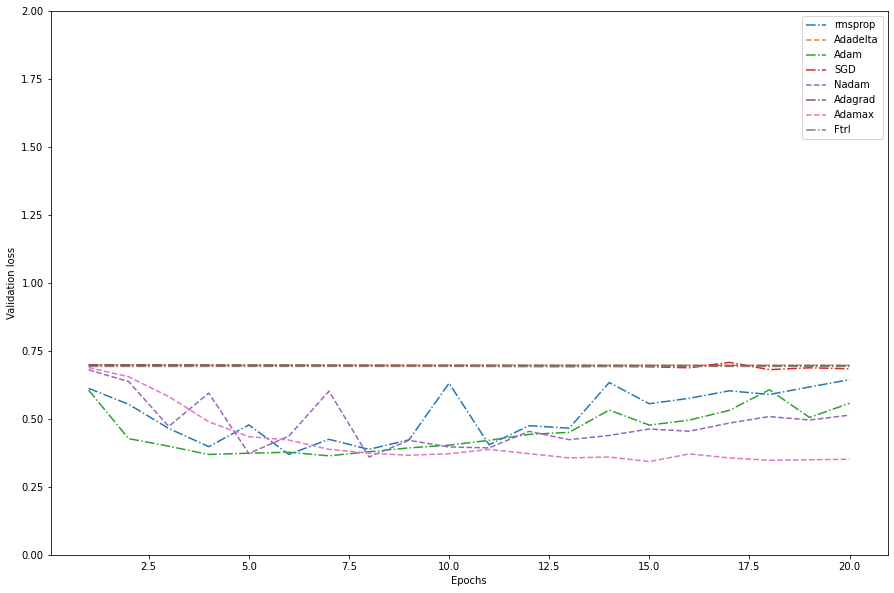

In [50]:
epochs = range(1,21)

plt.figure(figsize=(15,10))
plt.ylim(0, 2)



plt.plot(epochs, val_loss1, '-.', label='rmsprop')
plt.plot(epochs, val_loss2, '--', label='Adadelta')
plt.plot(epochs, val_loss3, '-.', label='Adam')
plt.plot(epochs, val_loss4, '-.', label='SGD')
plt.plot(epochs, val_loss5, '--', label='Nadam')
plt.plot(epochs, val_loss6, '-.', label='Adagrad')
plt.plot(epochs, val_loss7, '--', label='Adamax')
plt.plot(epochs, val_loss8, '-.', label='Ftrl')



plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

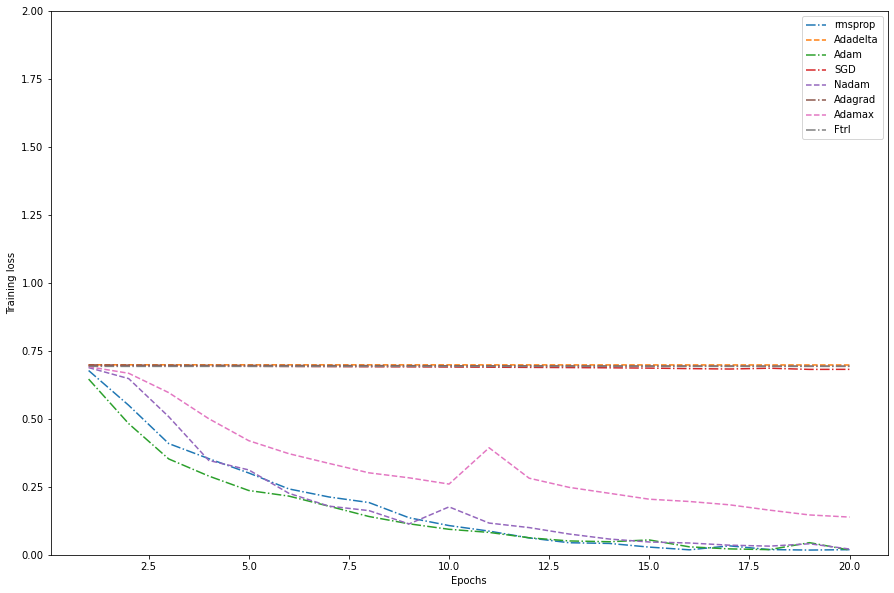

In [51]:
epochs = range(1,21)

plt.figure(figsize=(15,10))
plt.ylim(0, 2)

plt.plot(epochs, loss1, '-.', label='rmsprop')
plt.plot(epochs, loss2, '--', label='Adadelta')
plt.plot(epochs, loss3, '-.', label='Adam')
plt.plot(epochs, loss4, '-.', label='SGD')
plt.plot(epochs, loss5, '--', label='Nadam')
plt.plot(epochs, loss6, '-.', label='Adagrad')
plt.plot(epochs, loss7, '--', label='Adamax')
plt.plot(epochs, loss8, '-.', label='Ftrl')



plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()